# Project : Credit Card Customer Segmentation

## Import the necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install yellowbrick

In [2]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering 

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage


## Read the dataset

In [80]:
# Reading the dataset 

data = pd.read_excel('Credit Card Customer Data.xlsx')

In [81]:
# copying data to another varaible to avoid any changes to original data

data_df=data.copy()

## View the first and last 5 rows of the dataset

In [82]:
data_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [83]:
data_df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


## Understand the shape of the dataset

In [84]:
data_df.shape

(660, 7)

- There are total 7 columns and 660 observations in the dataset

## Check the data types of the columns for the dataset

In [85]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- We can see that no columns have less than 660 non-null values i.e. no columns have missing values.
- All variables are of type 'integer'

## Check the number of unique values in each column

In [86]:
data_df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- We can drop the column Sl_No as it is unique for each customer and will not add value to the model.
- There are no categorical columns
- There are 655 unique values of Customer Key whereas total number of records are 660. That means some Customer keys are duplicated. Lets find out

In [87]:
#Dropping Sl_No column

data_df.drop(columns='Sl_No',inplace=True)

In [88]:
#Finding duplicate records

data_df[data_df['Customer Key'].duplicated()]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,47437,17000,7,3,1,0
398,96929,67000,6,2,2,2
432,37252,59000,6,2,1,2
541,50706,60000,7,5,2,2
632,97935,187000,7,1,7,0


- There are 5 duplicate records. 
- Lets check if those records hold same data or not

In [89]:
#Display all the duplicate records sorted by Customer Key value

data_df[data_df['Customer Key'].isin(['47437', '96929', '37252', '50706', '97935'])].sort_values(by='Customer Key', ascending=True)        

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


Even though there are 5 duplcate customer key records, the value they contain is not same.
It is possible that the same customer has more than one account with the bank. 
For now I am not going to involve Customer Key column in model creation.  
Therefore I am not going to remove the duplicate keys from the dataset as of now.

## Summary of the data

In [90]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


#### Observations:
- Total_Credit_Cards has some outliers at the right end as 75th percentile value is 6 and max value is 10
- Mean and median of Total_Credit_Cards column are close to each other i.e. approx 4.6 and 5 respectively.
- Mean and median of Total_visits_bank column are very close to each other i.e. approx 2.4 and 2 respectively.
- Total_visits_online has some outliers at the right end as 75th percentile value is 4 and max value is 15. We need to explore this further.
- Total_calls_made has some outliers at the right end as 75th percentile value is 5 and max value is 10

## Check for null values

In [91]:
data_df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in our data

## EDA

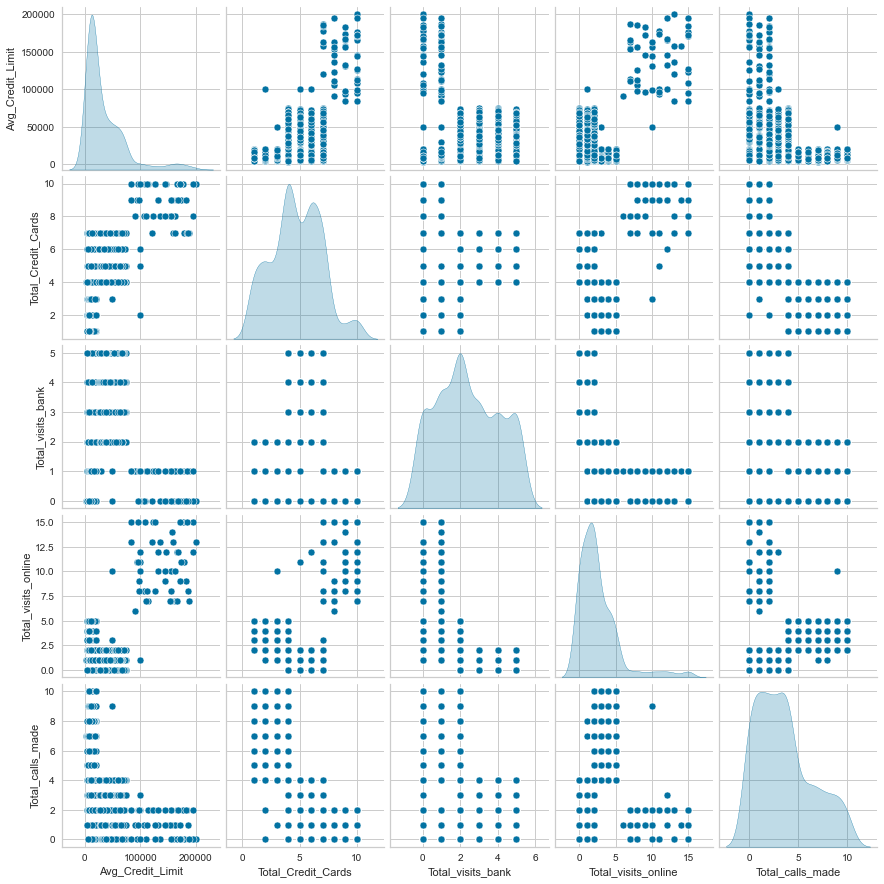

In [92]:
all_col = data_df.iloc[:,1:].columns.tolist()
sns.pairplot(data_df[all_col],diag_kind="kde")

#### Observations:
- None of the columns are normally distributed
- Distribution of total_Credit_Cards, Total_visits_bank, and Total_calls_made seems to be multimodal
- Distribution of Total_visits_online and Avg_Credit_Limit are right skewed 

## Univarite Analysis:

In [93]:
#While doing uni-variate analysis of numerical variables we want to study their central tendency 
#and dispersion.
#Let us write a function that will help us create boxplot, histogram and countplot for any input numerical 
#variable.
#This function takes the numerical column as the input and returns the boxplots 
#histograms, and countplots for the variable.

def histogram_boxplot_countplot(feature, figsize=(10,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2, ax_ct2) = plt.subplots(nrows = 3, # Number of rows of the subplot grid= 2
                                           sharex = False, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .35, .45)}, 
                                           figsize = figsize 
                                           ) # creating the 3subplots
    
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    
    sns.countplot(x=feature, ax=ax_ct2)

### Avg_Credit_Limit 

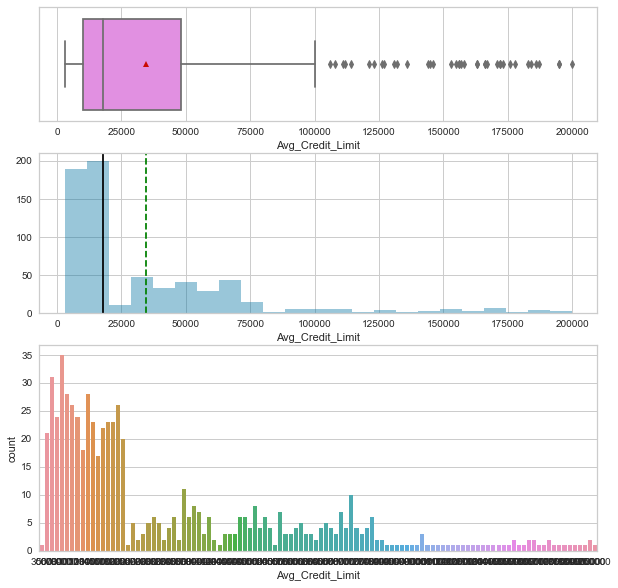

In [94]:
histogram_boxplot_countplot(data_df['Avg_Credit_Limit'])

- The distribution for Avg_Credit_Limit is right skewed
- The countplot says, the majority of customers have a low credit limit.

### Total_Credit_Cards  

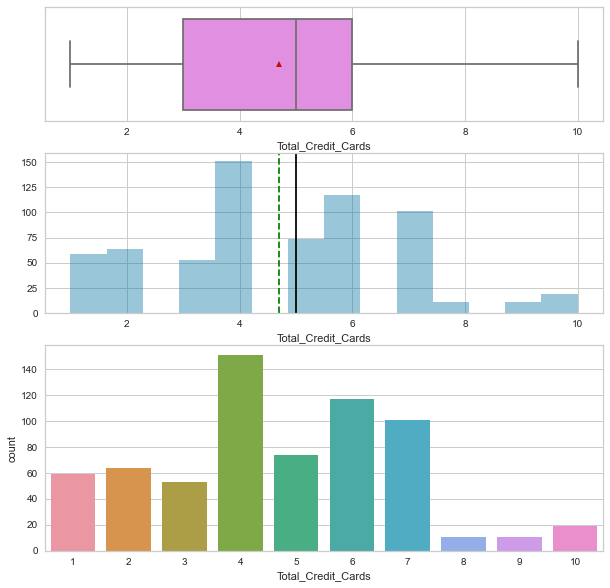

In [95]:
histogram_boxplot_countplot(data_df['Total_Credit_Cards'])

- Total_Credit_Cards distribution looks approximately normally distributed.
- The boxplot for Total_Credit_Cards column confirms that most the values lies between 3 to 6.
- From the countplot we see that Majority of customers have >3 and <8 credit cards 

### Total_visits_bank

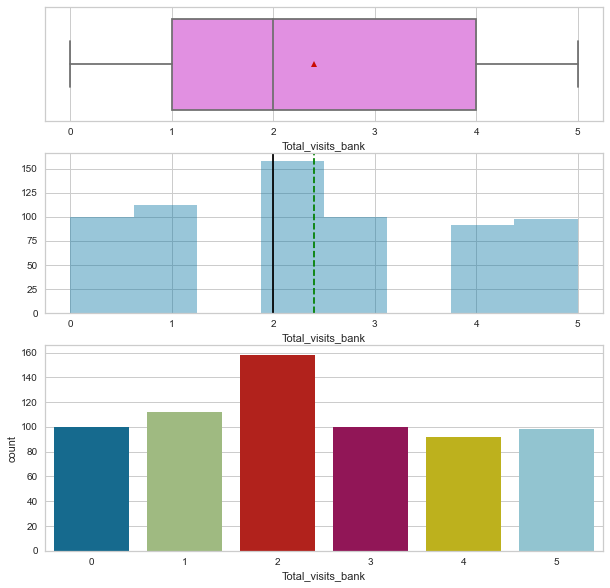

In [96]:
histogram_boxplot_countplot(data_df['Total_visits_bank'])

- Total_visits_bank distribution looks approximately normally distributed.
- The boxplot for Total_visits_bank column confirms that most the values lies between 2 to 3.
- The countplot says, maximum customers visited bank more than 2 times

### Total_visits_online

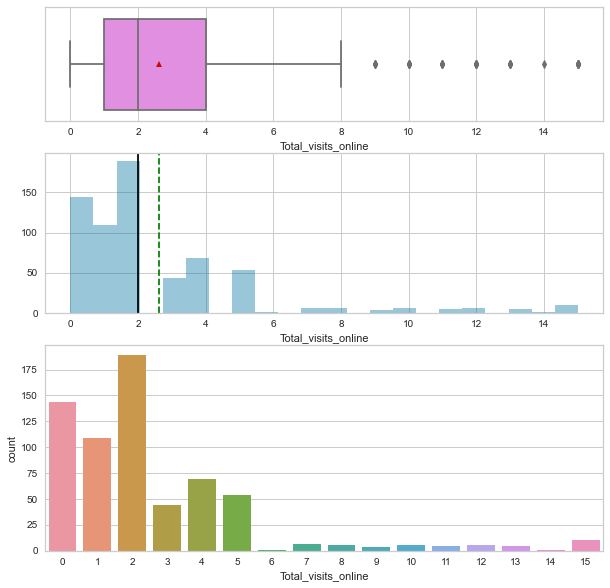

In [97]:
histogram_boxplot_countplot(data_df['Total_visits_online'])

- The distribution for Total_visits_online shows that most the values lies between 0 to 6.
- The distribution for Total_visits_online is right skewed
- The coumtplot says, very few customers are comfortable to do online banking

### Total_calls_made

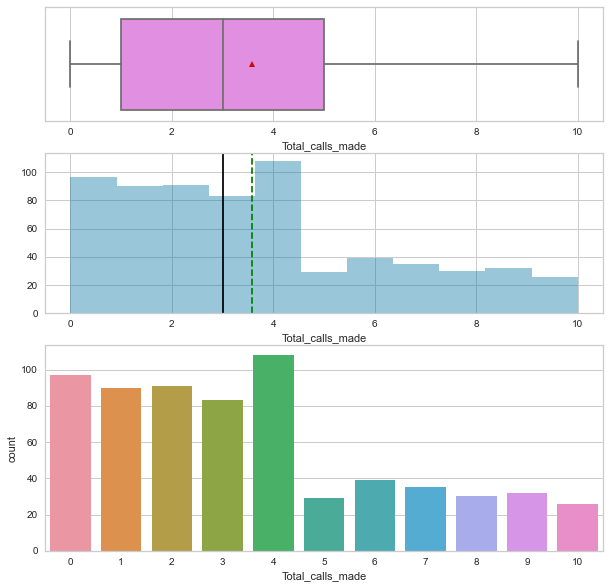

In [98]:
histogram_boxplot_countplot(data_df['Total_calls_made'])

- The distribution for Total_calls_made shows that most the values lies between 0 to 5.
- The distribution for Total_calls_made is right skewed
- The countplot says, more customers prefer to call the bank than visiting online or visiting bank in person

#### Insights:
From the above analysis, I came up with following observations:

- Majority customers have less than 100,000 average credit limit
- more than 50 % of customers have 4 to 7 credit cards
- less than 50 % of customers have visited bank only once or never 
- Majority of customers do not prefer online banking
- Majority of customers do not like to call bank.

Based on the observations, there could be certain groups of customers
1. Customers who do not prefer online banking
2. Customers who like to visit the bank in person
3. Customers who like to call the bank rather than visiting in person or visiting online.

## Bivariate Analsysis

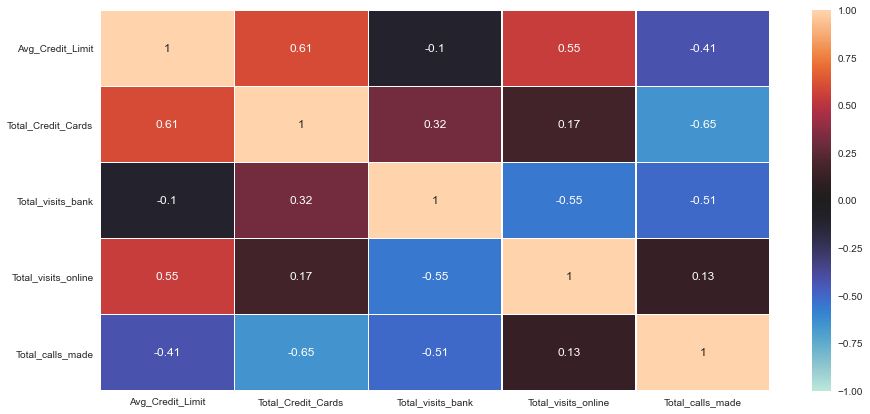

In [22]:
plt.figure(figsize=(15,7))

sns.heatmap(data_df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

plt.show()

#### Observations:

- Avg_Credit_Limit is strongly positively correlated with Total_Credit_Cards and Total_visits_online
which is obvious because if any customer has high credit limit, the customer more likely has more number of credit cards 

## Data Scaling 

In [99]:
#Scaling the data set before clustering using StandardScaler

scaler=StandardScaler()
subset=data_df.iloc[:,1:].copy()
subset_scaled=scaler.fit_transform(subset)

#Note: Customer key column is not part of subset_scaled_df

In [100]:
#Creating a dataframe from the scaled data above

subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

In [101]:
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [102]:
subset_scaled_df.tail()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537
659,3.522245,1.982253,-1.473731,3.202298,-0.553005


## K-Means Clustering

### Elbow method to determine number of clusters

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9432062854973338
Number of Clusters: 7 	Average Distortion: 0.9095137283638062
Number of Clusters: 8 	Average Distortion: 0.8900070813727377
Number of Clusters: 9 	Average Distortion: 0.8662737176573598


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

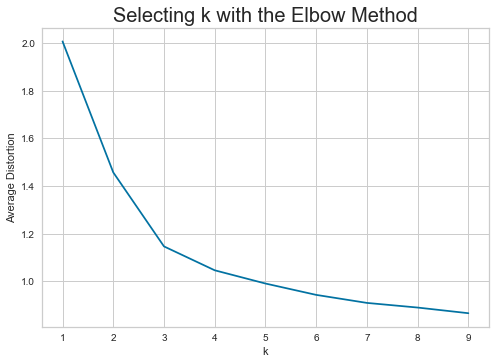

In [103]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    k_model = KMeans(n_clusters=k)
    k_model.fit(subset_scaled_df)
    k_prediction = k_model.predict(subset_scaled_df)
    distortion = sum(np.min(cdist(subset_scaled_df, k_model.cluster_centers_, 'euclidean'), 
                          axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

- The appropriate value of k from elbow curve seems to be 3

### Lets us check silhoutte score

In [104]:
k_sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    k_sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2720738103481507)
For n_clusters = 6, silhouette score is 0.2553480159463278)
For n_clusters = 7, silhouette score is 0.24839206039750203)
For n_clusters = 8, silhouette score is 0.22688646642612081)
For n_clusters = 9, silhouette score is 0.21863849504487903)


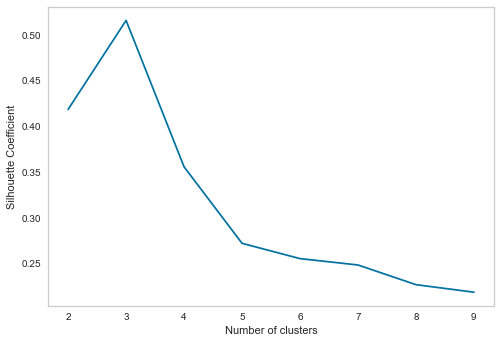

In [105]:
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.plot(cluster_list,k_sil_score)
plt.grid()

- From silhouette score, it seems that 3 is good value of k

### Finding optimal no. of clusters with silhouette coefficients

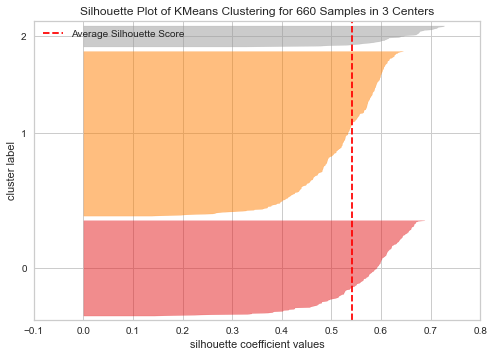

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [115]:
#Lets try for k = 3

visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

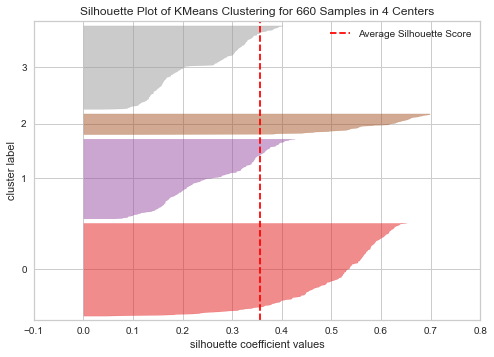

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [107]:
#Lets try for k = 4

visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

### 3 is appropriate number of clusters silhoutte score is high enough and there is knick at 3 in elbow curve

In [108]:
kmeans = KMeans(n_clusters=3, random_state=0)
k_model = kmeans.fit_predict(subset_scaled_df)

In [109]:
k_labels = kmeans.labels_
k_s_score = silhouette_score(subset_scaled_df, k_labels, metric='euclidean')
k_s_score

0.5157182558881063

In [110]:
#Here we add the predictions to the unscaled data so that we can gain some real world interpretability.

data_df['K_means_segments'] = k_model
subset_scaled_df['K_means_segments'] = k_model
data_df.groupby('K_means_segments').count()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,,
0,386,386,386,386,386,386
1,224,224,224,224,224,224
2,50,50,50,50,50,50


In [35]:
data_df['K_means_segments'] = k_labels
cluster_profile = data_df.groupby('K_means_segments').mean()
cluster_profile['count'] = data_df.groupby('K_means_segments')['Avg_Credit_Limit'].count().values
cluster_profile.index = ['Cluster0', 'Cluster1', 'Cluster2']
cluster_profile

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count
Cluster0,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,386
Cluster1,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,224
Cluster2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [36]:
#Before I draw bar plot facts to note:  
#Avg_Credit_Limit holds values in thousands, 
#whereas all othe columns hold values in tens. 
#Therefore the graph will be dominated by Avg_Credit_Limit. 
#Only for viewing purposes, I will multiply values in Avg_Credit_Limit by 0.0001 
#and add a new column to the dataframe so that all colummns will be visible in bar graph. 
#I will not use that column for the models later as I do not need it for further analysis.

s_acl = data_df['Avg_Credit_Limit'] * 0.0001
data_df.insert(2, 'scaled_ACL', s_acl)
data_df

,Customer Key,Avg_Credit_Limit,scaled_ACL,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,87073,100000,10.0,2,1,1,0,0
1,38414,50000,5.0,3,0,10,9,1
2,17341,50000,5.0,7,1,3,4,0
3,40496,30000,3.0,5,1,1,4,0
4,47437,100000,10.0,6,0,12,3,2
...,...,...,...,...,...,...,...,...
655,51108,99000,9.9,10,1,10,0,2
656,60732,84000,8.4,10,1,13,2,2
657,53834,145000,14.5,8,1,9,1,2
658,80655,172000,17.2,10,1,15,0,2


<AxesSubplot:xlabel='K_means_segments'>

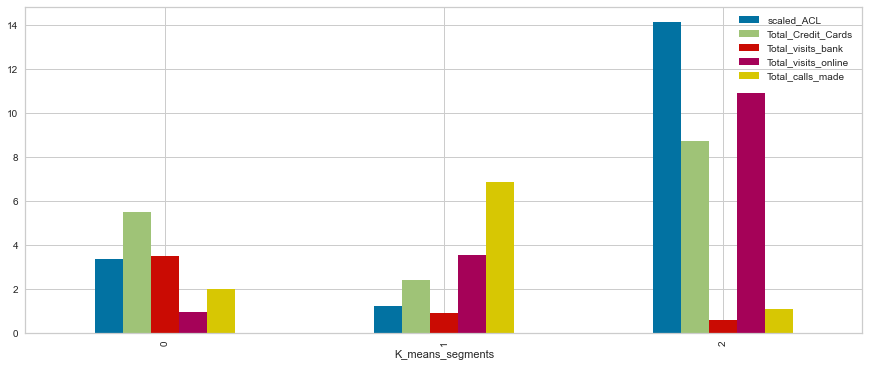

In [37]:
#We do ot need Customer Key and Avg_Credit_Limit for bar plot

data_df.iloc[:,2:].groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

#### Observation:   
- Clusters 0 :
    - Avg_Credit_Limit: Customers have low average credit limit
    - Total_Credit_Cards: Number of crdit cards customers have is medium, about 5 credit cards
    - Total_visits_bank: Number of bank visits by customers is medium
    - Total_visits_online: Number of online bank visits by customers is lowest
    - Total_calls_made: Number of calls made to bank by customers is low
    
- Cluster 1 :
    - Avg_Credit_Limit: Customers have very low (lowest) average credit limit
    - Total_Credit_Cards: Number of crdit cards customers have is low around 2 to 3
    - Total_visits_bank: Number of bank visits by customers is low
    - Total_visits_online: Number of online bank visits by customers is low but more than first cluster
    - Total_calls_made: Number of calls made to bank by customers is medium
   
- Cluster 2 :
    - Avg_Credit_Limit: customers have high credit limit
    - Total_Credit_Cards: Number of crdit cards customers have is high more than 8
    - Total_visits_bank: Number of bank visits by customers is very low (lowest)
    - Total_visits_online: Number of online bank visits by customers is high
    - Total_calls_made: Number of calls made to bank by customers is very low 

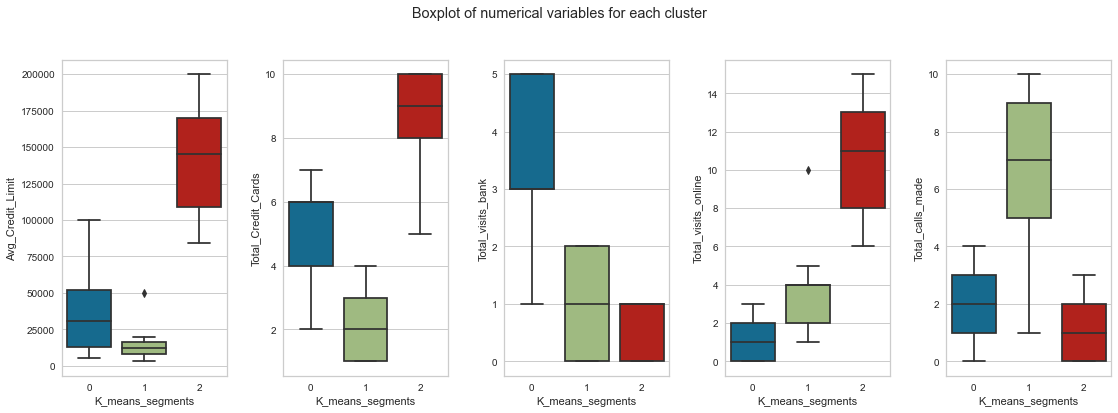

In [71]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_df[all_col[counter]],x=data_df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

#### Observations:
- Clusters 0 :
    - Total_Credt_Limit: Majority of customers have around 10,000 credit limit 
    - Total_Credit_Cards: Number of crdit cards customers have is low to medium
    - Total_visits_bank: Number of bank visits by customers have is high
    - Total_visits_online: Number of online bank visits by customers is low
    - Total_calls_made: Number of calls made to bank by customers is low to medium
- Cluster 1 :
    - Total_Credt_Limit: Majority of customers have low credit limit 
    - Total_Credit_Cards: Number of crdit cards customers have is low 
    - Total_visits_bank: Number of bank visits by customers have is low to medium
    - Total_visits_online: majority of customers used online banking services less than twice, i.e. only once
    - Total_calls_made: Number of calls made to bank by customers is low to high
   
- Cluster 2 :
    - Total_Credt_Limit: Majority of customers have high credit limit, above 75,000 
    - Total_Credit_Cards: Number of crdit cards customers have is high
    - Total_visits_bank: Number of bank visits by customers have is low
    - Total_visits_online: Number of online bank visits by customers is high
    - Total_calls_made: Number of calls made to bank by customers is low 

### Insights:

#### Cluster 0: 
Customers in this group, hold less number of credit cards, Therefore their average credit limit is also less. They do not like online banking, they do not like to call the bank much. They do like to visit the bank in person for their work.

#### Cluster 1: 
Customers in this group, hold very few credit cards, Therefore their average credit limit is lowest. They do not like online banking, They do not like to visit the bank in person for their work. They like calling the bank more, instead of going there personally or going online.

#### Cluster 2: 
Customers in this group, hold very lots of credit cards, Therefore their average credit limit is highest. They do like online banking, They do not like to visit the bank in person for their work. They also do not like calling the bank much.

## Hierarchical Clustering

For hierarchical clustering, I begin by evaluating the cophenetic coefficients for each linkage type and distance_metrics ('chebyshev', 'euclidean', 'mahalanobis', 'cityblock'). 

Below is a list of said outcomes.  

I have picked euclidean for the metric and average for linkage based on the result.

In [40]:
#cophenet index is a measure of the correlation between the distance of points in feature space 
#and distance on dendrogram closer it is to 1, the better is the clustering

cols = list(subset_scaled_df.columns)

linkage_methods = ['ward', 'complete', 'average', 'single', 'weighted', 'centroid', 'median']
distance_metrics = ['chebyshev', 'euclidean', 'mahalanobis', 'cityblock']

high_corr = 0
high_dm_lm = [0,0]

for dm in distance_metrics:
    print()
    for link in linkage_methods:
        if link == 'ward' and dm != 'euclidean':
            pass
        elif link == 'centroid' and dm != 'euclidean':
            pass
        elif link == 'median' and dm != 'euclidean':
            pass
        else:
            Z = linkage(subset_scaled_df[cols], metric=dm, method=link)
            c, coph_dists = cophenet(Z , pdist(subset_scaled_df[cols]))
            if c > .75:
                print('Distance Metrics:',dm, ', Linkage Method:',link,':', c)
                if high_corr < c:
                    high_corr = c
                    high_dm_lm[0] = dm
                    high_dm_lm[1] = link
                


Distance Metrics: chebyshev , Linkage Method: complete : 0.8623270916886306
Distance Metrics: chebyshev , Linkage Method: average : 0.9160784250471772
Distance Metrics: chebyshev , Linkage Method: single : 0.8978014062578786
Distance Metrics: chebyshev , Linkage Method: weighted : 0.9109044268579872

Distance Metrics: euclidean , Linkage Method: ward : 0.774233615737438
Distance Metrics: euclidean , Linkage Method: complete : 0.8860521900934342
Distance Metrics: euclidean , Linkage Method: average : 0.9168725782090766
Distance Metrics: euclidean , Linkage Method: single : 0.8788676940541079
Distance Metrics: euclidean , Linkage Method: weighted : 0.9133393931042242
Distance Metrics: euclidean , Linkage Method: centroid : 0.9134704636213649
Distance Metrics: euclidean , Linkage Method: median : 0.8870097301491704

Distance Metrics: mahalanobis , Linkage Method: average : 0.8467618899578886
Distance Metrics: mahalanobis , Linkage Method: single : 0.8959952526724227
Distance Metrics: mah

In [41]:
print('Highest cophenet correlation obtained: {}'.format(high_corr))
print('With: {} distance metric and {} linkage method'.format(high_dm_lm[0],high_dm_lm[1]))

Highest cophenet correlation obtained: 0.9168725782090766
With: euclidean distance metric and average linkage method


- I will use euclidean distance metric and average linkage method as it gives the best cophenet score

### Next, I need to decide on the number of clusters. 
#### There are two methods I use here to reach to my conclusion.
1. Silhouette score
2. Dendrogram

### Let's use silhouette score to decide number of clusters.

In [42]:
h_sil_score = []
h_cluster_list = list(range(2,10))
for k in h_cluster_list:
    h_clusterer = AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    h_preds = h_clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    h_score = silhouette_score(subset_scaled_df, h_preds)
    h_sil_score.append(h_score)
    print("For n_clusters = {}, silhouette score is {})".format(k, h_score))

For n_clusters = 2, silhouette score is 0.5793418065366525)
For n_clusters = 3, silhouette score is 0.5411228112448502)
For n_clusters = 4, silhouette score is 0.49320645676320807)
For n_clusters = 5, silhouette score is 0.4533449955746319)
For n_clusters = 6, silhouette score is 0.4262491704857363)
For n_clusters = 7, silhouette score is 0.4292719424697936)
For n_clusters = 8, silhouette score is 0.3600352261209959)
For n_clusters = 9, silhouette score is 0.35851681582727707)


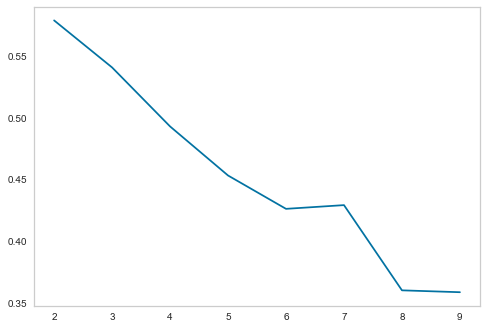

In [43]:
plt.plot(h_cluster_list,h_sil_score)
plt.grid()

The plot shows the silhouette score by the number of clusters. Based on this I would not want more than 4 clusters as the score gets too low. Should try with cluster number 2 or 3. The silhouette score is most for cluster number 2.

### Let's use dendogram to decide number of clusters.

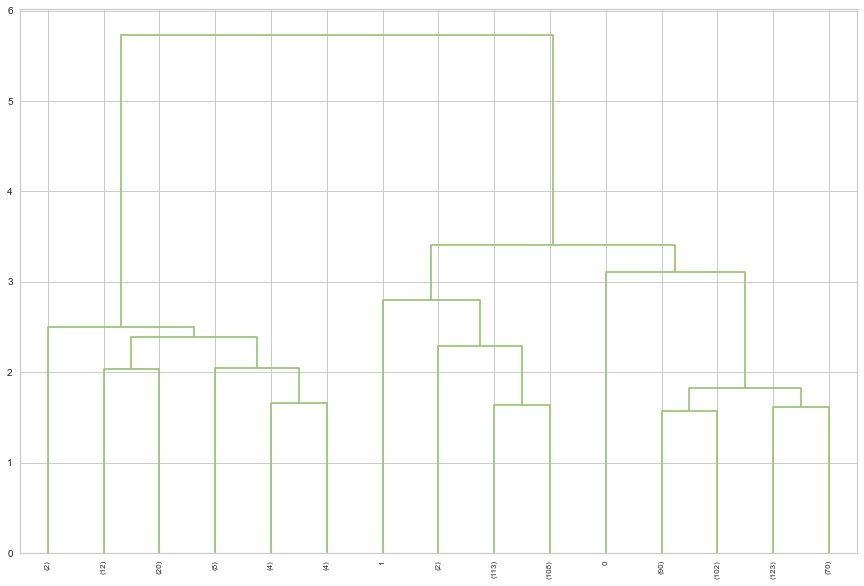

In [44]:
Z = linkage(subset_scaled_df[cols], metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df[cols]))
plt.figure(figsize=(15, 10))

dendrogram(Z, p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.show()

Based on the above dendogram, we could make 3 clusters but then the second cluster will have very less data points. 

Therefor we could make 2 clusters. 

Also from k-means clustering we can see that Cluster0 segment matches Cluster1 segment. Therefore I will have only 2 clusters for Hierarchical clustering.

Also Cluster2 users have more credit cards and more Average Credit Limit.

Also silhouette score is maximum (0.5793418065366525) for 2 clusters 

### Let's take 2 as appropriate number of clusters


In [45]:
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
h_model = hc.fit_predict(subset_scaled_df)

In [46]:
h_labels = hc.labels_
h_s_score = silhouette_score(subset_scaled_df, h_labels, metric='euclidean')
h_s_score

0.5793418065366525

In [47]:
data_df['hc_segments'] = h_labels
subset_scaled_df['hc_segments'] = h_labels
data_df.groupby('hc_segments').count()

,Customer Key,Avg_Credit_Limit,scaled_ACL,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
hc_segments,,,,,,,,
0,610,610,610,610,610,610,610,610
1,50,50,50,50,50,50,50,50


In [48]:
data_df['hc_segments'] = h_labels
cluster_profile2 = data_df.groupby('hc_segments').mean()
cluster_profile2['count'] = data_df.groupby('hc_segments')['Avg_Credit_Limit'].count().values
cluster_profile2.index = ['Cluster0', 'Cluster1']
cluster_profile2

,Customer Key,Avg_Credit_Limit,scaled_ACL,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count
Cluster0,55012.97541,25847.540984,2.584754,4.37541,2.55082,1.92623,3.788525,0.367213,610
Cluster1,56708.76000,141040.000000,14.104000,8.74000,0.60000,10.90000,1.080000,2.000000,50


<AxesSubplot:xlabel='hc_segments'>

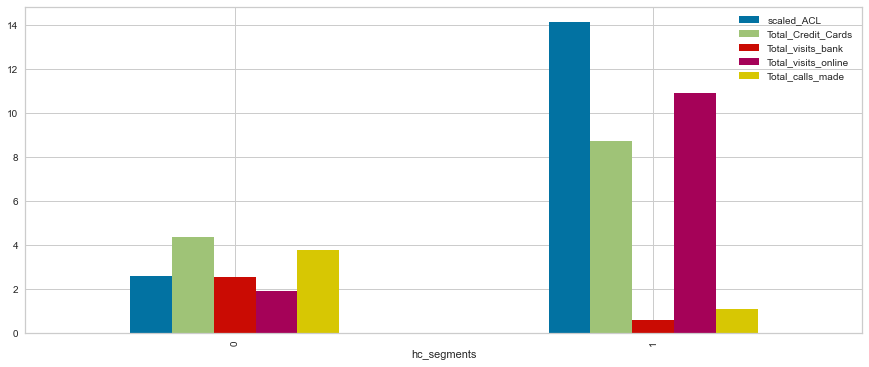

In [64]:
# We do ot need Customer Key and Avg_Credit_Limit for bar plot
data_df.iloc[:,[2,3,4,5,6,8]].groupby('hc_segments').mean().plot.bar(figsize=(15,6))

#### Observations:
- Clusters 0:
    - Avg_Credit_Limit: Customers have low average credit limit
    - Total_Credit_Cards: Number of crdit cards customers have is low < 5
    - Total_visits_bank: Number of bank visits by customers have is low
    - Total_visits_online: Number of online bank visits by customers is low
    - Total_calls_made: Number of calls made to bank by customers is very low
    
- Cluster 1:
    - Avg_Credit_Limit: customers have high average credit limit
    - Total_Credit_Cards: Number of crdit cards customers have is high > 8
    - Total_visits_bank: Number of bank visits by customers are lesser
    - Total_visits_online: Number of online bank visits by customers is very high
    - Total_calls_made: Number of calls made to bank by customers is low but higher than Group0

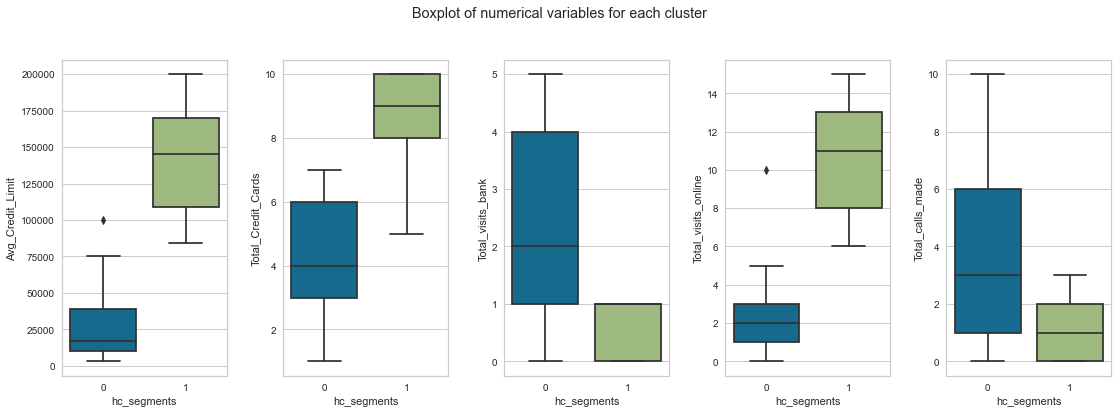

In [68]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_df[all_col[counter]],x=data_df['hc_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

#### Observations:
- Clusters 0 :
    - Total_Credt_Limit: Majority of customers have low credit limit 
    - Total_Credit_Cards: Number of crdit cards customers have is low 
    - Total_visits_bank: Number of bank visits by customers is high
    - Total_visits_online: Number of online bank visits by customers is low
    - Total_calls_made: Number of calls made to bank by customers is high
- Cluster 1 :
    - Total_Credt_Limit: Majority of customers have medium to high credit limit 
    - Total_Credit_Cards: Number of crdit cards customers have is high 
    - Total_visits_bank: Number of bank visits by customers is low 
    - Total_visits_online: majority of customers used online banking services medium to high
    - Total_calls_made: Number of calls made to bank by customers is low 



#### Insights:

#### Cluster 0: 
Customers in this group, hold less number of credit cards, Therefore their average credit limit is also less. They do not like online banking, they do not like to call the bank much. They do like to visit the bank in person for their work.

#### Cluster 1: 
Customers in this group, hold more number of credit cards, Therefore their average credit limit is also more. They do like online banking, they do call the bank more often. They do not like to visit the bank in person for their work.


### Lets us check silhoutte score for both models

In [78]:
k_h_S_Scores = [['KMeans',k_s_score ], ['Hierarchical',h_s_score ]]

k_h_S_Scores = pd.DataFrame(k_h_S_Scores, columns=['Clustering Method', 'Silhouette Score']) 
k_h_S_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.579342
0,KMeans,0.515718


### Compare each cluster of K-means to Hierarchical clusters

#### Visual representation

#### K_Means

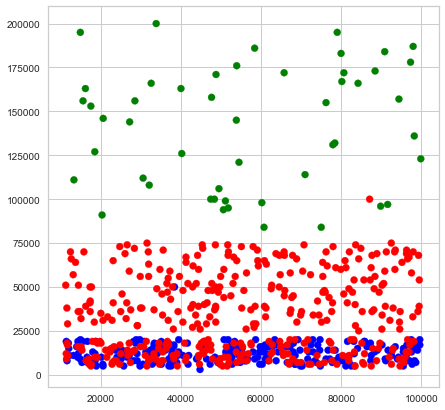

In [113]:
# visualize clusters
color_map={0:'red',1:'blue',2:'green'}
label_color=[color_map[l] for l in kmeans.labels_]
plt.figure(figsize=(7,7))
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1],c=label_color)

#### Hierarchical

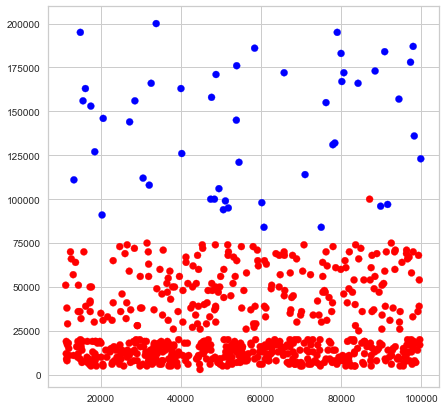

In [114]:
# visualize clusters
color_map={0:'red',1:'blue'}
label_color=[color_map[l] for l in h_labels]
plt.figure(figsize=(7,7))
h_plot = plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1],c=label_color)


#### Observations:
- k-Means: 
    - There are 3 clusters in K-Mean clustering
       - Cluster0: Customers who like to visit bank personaly.
       - Cluster1: Customers who like to call the bank.
       - Cluster2: Customers who line online banking.
    
    - If we look carefully at the K-means visual representation, we can see that Cluster0 segment matches Cluster1. Cluster1 data points are overlapping Cluster0 points. 
    - Also Cluster2 has less records compared to Cluster0 and Cluster1
    - Cluster0 has maximum records
    - That means few customers prefer online banking over traditional banking
    
    
- Hierarchical clustering:
    - There are 2 clusters in Hierarchical clustering
        - Cluster0: Customers who do not like online banking
        - Clister1: Customers who like online banking
   
   - If we look carefully at Hierarchical clustering visual representation, we can see that Cluster0 of Hierarchical clustering consists of records of Cluster0 and Cluster1 of K-Means clustering.
   - Also cluster 1 has fewer records compared to Cluster0
   - That means few customers prefer online banking over traditional banking

## Analysis of the clusters formed 

- The clusters are formed based on customers favorite way of banking.

    - Some Customers prefer online banking.
    - Some do not trust online banking. they like to visit the bank personally for their business.
    - Some customers like to call the bank whenever possible instead of visiting bank personally or visiting banks website.

- This is seen in K-Means clustering

- Since not all bank related work can be done on phone, you either need to do online banking or visit the bank personally, therefore we can group customers in 2 clusters instead of 3. 

   - Customers who prefer online banking
   - Customers who do not prefer online banking

- This is seen in Hierarchical clustering

- In both methods, customers who prefer online banking are less compared to customers who do not prefer online banking.


## Key Questions

### How many different segments of customers are there?

There are three distinct categories of customers:
1. Customers who like to visit the bank in person
2. Customers who like to call the bank
3. Customers who like online banking

### How are these segments different from each other?

1. Customers who like to visit the bank in person: These customers prefer to handle bank transactions in person. They have the lowest number of credit cards and the lowest available credit. They are also the most active users.

2. Customers who like to call the bank: These customers prefer to call the bank instead of visiting the bank personally or online for handling their transactions. They prefer working remotely.

3. Customers who like online banking: These customers prefer online transactions. They also have the most number of credit cards and the highest available credit.

### What are your recommendations to the bank on how to better market to and service these customers?

1. We can change our contact methods according to these customer preferences. 
Customers who prefer online banking, or phone banking, may prefer emails or text messages, while customers who prefer to visit bank personally, may prefer notifications via mail or they can be given information manually while they are at the bank. 

2. Since customers who prefer online banking, have the most credit, we may assume that they do use this high monthly credit limit, this cluster of customers might be the group of our interest. 

3. So for our next ad campaign, we may need to focus more on digital advertisement. 